<a href="https://colab.research.google.com/github/msoni6620/Sentiment_analysis_Project/blob/main/Sentiment_analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.shape

(1000, 2)

In [7]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
df.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [12]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [14]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [15]:
df['length']=df['Review'].apply(len)
df.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [16]:
df[df['length']==100]['Review'].iloc[0]

"Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back."

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
import string
from nltk.corpus import stopwords

In [19]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vectorizer=CountVectorizer(max_df=0.9,min_df=10)


In [41]:
vectorizer

CountVectorizer(max_df=0.9, min_df=10)

In [43]:
X=vectorizer.fit_transform(df['Review']).toarray()

In [44]:
X



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
def text_process(msg):
  nopunc=[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [48]:
df['tokenized_Review']=df['Review'].apply(text_process)

In [49]:
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


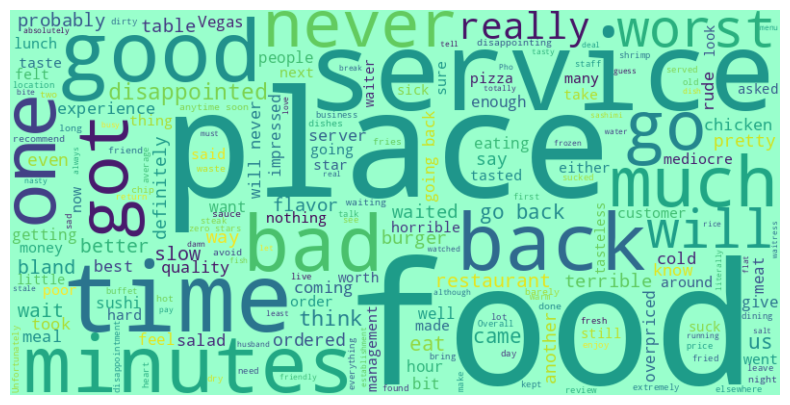

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==0,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='#99FFCC').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

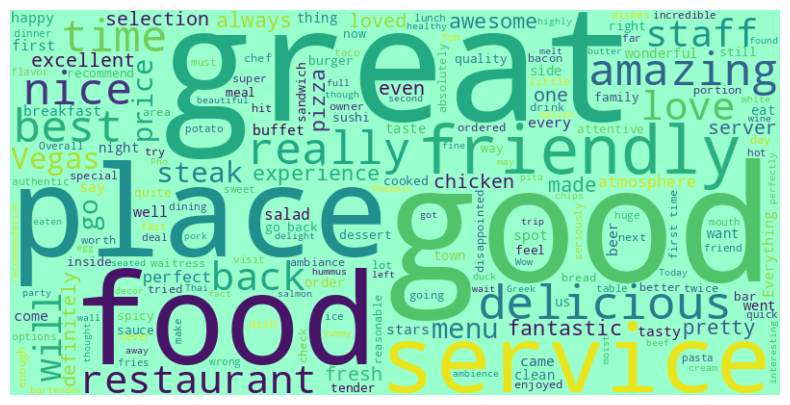

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud=df.loc[df['Liked']==1,:]
text=' '.join([text for text in word_cloud['Review']])
wordcloud=WordCloud(width=800,height=400,background_color='#99FFCC').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [52]:
X=vectorizer.fit_transform(df['tokenized_Review']).toarray()

In [53]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['tokenized_Review'],df['Liked'],random_state=107,test_size=0.2)

In [57]:
X_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [58]:
train_vectorized=vectorizer.transform(X_train)
test_vectorized=vectorizer.transform(X_test)

In [59]:
X_train_array=train_vectorized.toarray()
X_test_array=test_vectorized.toarray()


In [60]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_array,y_train)

GaussianNB()

In [61]:
y_train_preds_nb=nb.predict(X_train_array)
y_test_preds_nb=nb.predict(X_test_array)

In [63]:
y_test_preds_nb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [64]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [65]:
pd.DataFrame({"actual_y_value":y_test,"predicted_y_value":y_test_preds_nb})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [66]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_auc_score, auc, classification_report



In [67]:
def print_metrics(actual,predicted):
  print('accuracyScore {}'.format(accuracy_score(actual, predicted)))
  print('precisionScore {}'.format(precision_score(actual, predicted)))
  print('recallScore {}'.format(recall_score(actual,predicted)))
  print('F1Score {}'.format(f1_score(actual, predicted)))
  print('rocAucScore {}'.format(roc_auc_score(actual, predicted)))
  print('confusionMatrix {}'.format(confusion_matrix(actual, predicted)))
  print('classificationReport {}'.format(classification_report(actual, predicted)))


In [68]:
print_metrics(y_train, y_train_preds_nb)

accuracyScore 0.76375
precisionScore 0.8403908794788274
recallScore 0.6482412060301508
F1Score 0.7319148936170213
rocAucScore 0.7631753293832346
confusionMatrix [[353  49]
 [140 258]]
classificationReport               precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.84      0.65      0.73       398

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800



In [69]:
print_metrics(y_test,y_test_preds_nb)

accuracyScore 0.725
precisionScore 0.8133333333333334
recallScore 0.5980392156862745
F1Score 0.6892655367231638
rocAucScore 0.7275910364145659
confusionMatrix [[84 14]
 [41 61]]
classificationReport               precision    recall  f1-score   support

           0       0.67      0.86      0.75        98
           1       0.81      0.60      0.69       102

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



In [70]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
mnv=MultinomialNB()
mnv.fit(X_train_array,y_train)

MultinomialNB()

In [79]:
y_train_preds_mnv=mnv.predict(X_train_array)
y_test_preds_mnv=mnv.predict(X_test_array)

In [80]:
y_test_preds_mnv

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [81]:
print_metrics(y_train,y_train_preds_mnv)

accuracyScore 0.77
precisionScore 0.8092485549132948
recallScore 0.7035175879396985
F1Score 0.7526881720430108
rocAucScore 0.7696692417310432
confusionMatrix [[336  66]
 [118 280]]
classificationReport               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.81      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [82]:
print_metrics(y_test,y_test_preds_mnv)

accuracyScore 0.745
precisionScore 0.7802197802197802
recallScore 0.696078431372549
F1Score 0.7357512953367875
rocAucScore 0.7459983993597439
confusionMatrix [[78 20]
 [31 71]]
classificationReport               precision    recall  f1-score   support

           0       0.72      0.80      0.75        98
           1       0.78      0.70      0.74       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



In [102]:
#Hyper Parameter tuning
import numpy as np
best_accuracy=0.0
alpha_val=0
for i in np.arange(0.01,1.1,0.1):
  temp_cls=MultinomialNB(alpha=1)
  temp_cls.fit(X_train_array, y_train)
  y_test_pred_h_nbayes=temp_cls.predict(X_test_array)
  score=accuracy_score(y_test,y_test_pred_h_nbayes)
  print("Accuracy Score for Alpha{} is :{}%".format(round(i,1),round(score*100,2)))
  if(score>best_accuracy):
    best_accuracy=score
    alpha_val=i
print("***********************************************************")
print("The Best Accuracy {}% Alpha Value {}".format(round(best_accuracy*100,2),round(alpha_val,1)))

Accuracy Score for Alpha0.0 is :74.5%
Accuracy Score for Alpha0.1 is :74.5%
Accuracy Score for Alpha0.2 is :74.5%
Accuracy Score for Alpha0.3 is :74.5%
Accuracy Score for Alpha0.4 is :74.5%
Accuracy Score for Alpha0.5 is :74.5%
Accuracy Score for Alpha0.6 is :74.5%
Accuracy Score for Alpha0.7 is :74.5%
Accuracy Score for Alpha0.8 is :74.5%
Accuracy Score for Alpha0.9 is :74.5%
Accuracy Score for Alpha1.0 is :74.5%
***********************************************************
The Best Accuracy 74.5% Alpha Value 0.0
